Bounding Box Origin: (224, 167)


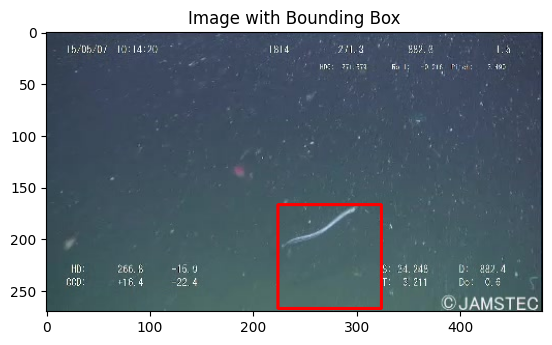

In [75]:
import json
import os
import cv2
import matplotlib.pyplot as plt

# Function to preprocess the annotation
def preprocess_annotation(annotation_path, image_path):
    # Check if the annotation file exists
    if not os.path.exists(annotation_path):
        raise FileNotFoundError(f"Annotation file not found: {annotation_path}")
    
    # Load JSON annotation
    with open(annotation_path, 'r') as file:
        annotation = json.load(file)

    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image file not found: {image_path}")
    
    # Process the annotation (example: extracting bounding box)
    for obj in annotation.get('objects', []):
        if 'bitmap' in obj:
            bbox_origin = obj['bitmap']['origin']
            bbox_data = obj['bitmap']['data']

            # Convert the bounding box info if needed
            x, y = bbox_origin
            print(f"Bounding Box Origin: ({x}, {y})")


    # Display the image with bounding box
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.rectangle(img, (x, y), (x + 100, y + 100), (255, 0, 0), 2)
    plt.title("Image with Bounding Box")
    plt.imshow(img)

    
    return img

# Test the function with error handling
image_path = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\images\vid_000003_frame0000003.jpg'
annotation_path = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\annotations\vid_000003_frame0000003.jpg.json'


try:
    preprocess_annotation(annotation_path, image_path)
except FileNotFoundError as e:
    print(e)


Extracted region at (224, 167) with size: (123, 140, 3)


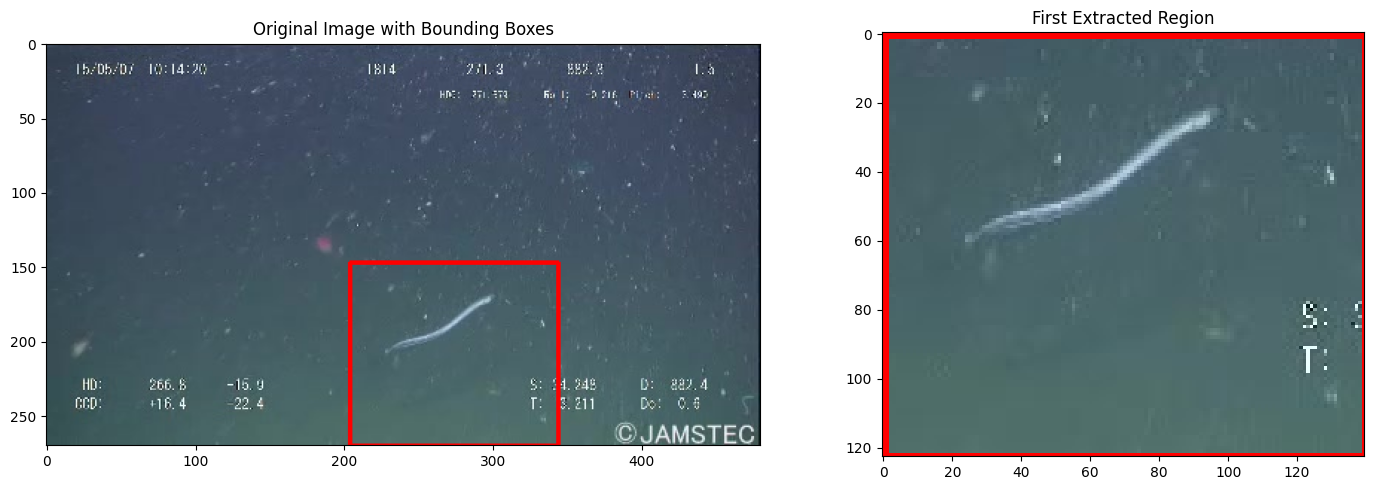

Successfully processed image. Found 1 regions.


In [77]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def extract_bbox_area(annotation_path, image_path, padding=20):
    """
    Extract image areas specified by bounding boxes with padding
    
    Args:
        annotation_path (str): Path to JSON annotation file
        image_path (str): Path to image file
        padding (int): Padding pixels to add around bounding box
        
    Returns:
        tuple: Original image with bounding boxes drawn and list of extracted regions
    """
    # Check if files exist
    if not os.path.exists(annotation_path):
        raise FileNotFoundError(f"Annotation file not found: {annotation_path}")
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    
    # Load JSON annotation and image
    with open(annotation_path, 'r') as file:
        annotation = json.load(file)
    
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Failed to load image")
    
    # Convert to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width = img.shape[:2]
    extracted_regions = []
    
    # Process each annotated object
    for obj in annotation.get('objects', []):
        if 'bitmap' in obj:
            # Get bounding box coordinates
            x, y = obj['bitmap']['origin']
            
            # Get bitmap data dimensions (if available)
            if isinstance(obj['bitmap']['data'], list):
                bbox_height = len(obj['bitmap']['data'])
                bbox_width = len(obj['bitmap']['data'][0]) if bbox_height > 0 else 0
            else:
                # Fallback to default size if bitmap data structure is different
                bbox_height = bbox_width = 100
            
            # Add padding but ensure we don't go outside image boundaries
            x1 = max(0, x - padding)
            y1 = max(0, y - padding)
            x2 = min(img_width, x + bbox_width + padding)
            y2 = min(img_height, y + bbox_height + padding)
            
            # Draw bounding box on original image
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
            # Extract the region with padding
            region = img_rgb[y1:y2, x1:x2]
            extracted_regions.append(region)
            
            print(f"Extracted region at ({x}, {y}) with size: {region.shape}")
    
    # Display results
    plt.figure(figsize=(15, 5))
    
    # Show original image with bounding boxes
    plt.subplot(121)
    plt.title("Original Image with Bounding Boxes")
    plt.imshow(img_rgb)
    plt.axis('on')
    
    # Show first extracted region if available
    if extracted_regions:
        plt.subplot(122)
        plt.title("First Extracted Region")
        plt.imshow(extracted_regions[0])
        plt.axis('on')
    
    plt.tight_layout()
    plt.show()
    
    return img_rgb, extracted_regions

# Example usage with error handling
def process_image_with_annotations(image_path, annotation_path, padding=20):
    try:
        original_img, regions = extract_bbox_area(annotation_path, image_path, padding)
        print(f"Successfully processed image. Found {len(regions)} regions.")
        return regions
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

# Test the function
if __name__ == "__main__":
    image_path = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\images\vid_000003_frame0000003.jpg'
    annotation_path = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\annotations\vid_000003_frame0000003.jpg.json'
    regions = process_image_with_annotations(image_path, annotation_path)

In [ ]:
# Preprocess the image

def preprocess_image(image_path):
    # Check if file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None

    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image. Please check the file path or format.")
        return None
    
    #Denoise the image
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    #Contrast Enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
    enhanced_img = clahe.apply(gray)

    #Convert to HSV
    hsv_img = cv2.cvtColor(enhanced_img, cv2.COLOR_GRAY2BGR)
    hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2HSV)

    #Removing Green and Blue Channels
    hsv_img[:, :, 0] = 0
    hsv_img[:, :, 1] = 0


    #Display the image
    plt.title("Original Image")
    plt.imshow(img)
    plt.show()

    plt.title("Denoised Image")
    plt.imshow(denoised_img)
    plt.show()

    plt.title("Contrast Enhanced Image")
    plt.imshow(enhanced_img, cmap='gray')
    plt.show()

    plt.title("HSV Image")
    plt.imshow(hsv_img)
    plt.show()


    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    return img
